# Preprocessing

1. There are 2 different types of loans:
    + Cash Loans
    + Revolving Loans
2. Occupation type
    + ~20 different occupation types
3. AMT_ANNUITY
    + log transformation
4. Amount income total
    + Remove outliers 
5. AMT_CREDIT
    + log transformation
6. NAME_EDUCATION_TYPE
    + ~5 education types
7. DAYS_EMPLOYED
    + Remove top outliers
    + Multiply by negative 1 to make positive
    + Bucket
        + < 6 months
        + 6 months - 1 year
        + 1 - 5 years
        + 5 - 10 years
        + 10 - 20 years
        + > 20 years
8. EXT_SOURCE_2
    + Missing less than 1% of the records
    + Already normalized
9. FLAG_OWN_CAR
    + Treat this like a flag if not null
10. REGION_RATING
    + One hot encoding
11. REGION_RATING_W_CITY
    + One hot encoding
12. CNT_FAM_MEMBERS
    + Recode to 1, 2, 3 and >=4
13. OBS_30_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >=1
14. DEF_30_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >=1 
15. OBS_60_CNT_SOCIAL_CIRCLE
    + Recode to - of >= 1
16. DEF_60_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >= 1
17. AMT_REQ_CREDIT_BUREAU_YEAR
    + Recode to 0, 1, 2 or >= 3
18. NAME_INCOME_TYPE
    + One Hot Encoding
19. NAME_FAMILY_STATUS
    + One hot encoding
20. NAME_HOUSING_TYPE
    + One hot encoding
21. REGION_POPULATION_RELATIVE
    + right skewed
22. FLAG_OWN_REALTY


In [2]:
import pandas as pd
import numpy as np


In [311]:
df = pd.read_csv('../home-credit-default-risk/application_train.csv')
df.shape

(307511, 122)

In [331]:
column_set = ['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'OCCUPATION_TYPE',
'AMT_ANNUITY',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'NAME_EDUCATION_TYPE',
'DAYS_EMPLOYED',
'EXT_SOURCE_2',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'CNT_FAM_MEMBERS',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE'
]

numeric_features = ['AMT_ANNUITY',
'AMT_INCOME_TOTAL',
'AMT_CREDIT']

categorical_features = [
    #'OCCUPATION_TYPE',
#'NAME_EDUCATION_TYPE',
#'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
#'REGION_RATING_CLIENT',
#'REGION_RATING_CLIENT_W_CITY',
#'CNT_FAM_MEMBERS_BKT',
#'EMPLOYMENT_BKT',
#'OBS_30_CNT_SOCIAL_CIRCLE_BKT',
#'DEF_30_CNT_SOCIAL_CIRCLE_BKT',
#'OBS_60_CNT_SOCIAL_CIRCLE_BKT',
#'DEF_60_CNT_SOCIAL_CIRCLE_BKT',
'AMT_REQ_CREDIT_BUREAU_YEAR_BKT',
#'NAME_INCOME_TYPE',
#'NAME_FAMILY_STATUS',
#'NAME_HOUSING_TYPE'
]

passthrough_features = ['EXT_SOURCE_2','REGION_POPULATION_RELATIVE']

In [315]:
df['OCCUPATION_TYPE'].isna().sum()

np.int64(96391)

In [276]:
# TO DO
# make a transformation pipeline
# train a logistic regression model using the dataset
# save the transformed dataset to the data directory

# Bucket Features

Apply transformations as vectors across the entire dataframe.

In [332]:
#OCCUPATION_TYPE
df['OCCUPATION_TYPE'] = df.OCCUPATION_TYPE.fillna("Unknown")

# CNT_FAM_MEMBERS_BKT
df['CNT_FAM_MEMBERS_BKT'] = pd.cut(
    df['CNT_FAM_MEMBERS'],
    bins = [0, 1, 2, 3, 4, float('inf')],
    labels = ['0','1','2','3','4 or more'],
    right=False
)

df['CNT_FAM_MEMBERS_BKT'] = df['CNT_FAM_MEMBERS_BKT'].cat.add_categories('Unknown').fillna('Unknown')

# EMPLOYMENT_BKT
df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365

df['EMPLOYMENT_BKT'] = pd.cut(
    df['YEARS_EMPLOYED'],
    bins=[0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')],
    labels=[
        '< 0.5 years',
        '0.5 - 1 year',
        '1 - 2 years',
        '2 - 5 years',
        '5 - 10 years',
        '10 - 20 years',
        '20 - 30 years',
        '> 30 years'
    ],
    right=False
)
df['EMPLOYMENT_BKT'] = df['EMPLOYMENT_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# OBS_30_CNT_SOCIAL_CIRCLE_BKT
df['OBS_30_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['OBS_30_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['OBS_30_CNT_SOCIAL_CIRCLE_BKT'] = df['OBS_30_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# DEF_30_CNT_SOCIAL_CIRCLE_BKT
df['DEF_30_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['DEF_30_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['DEF_30_CNT_SOCIAL_CIRCLE_BKT'] = df['DEF_30_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# OBS_60_CNT_SOCIAL_CIRCLE_BKT
df['OBS_60_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['OBS_60_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['OBS_60_CNT_SOCIAL_CIRCLE_BKT'] = df['OBS_60_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# DEF_60_CNT_SOCIAL_CIRCLE_BKT
df['DEF_60_CNT_SOCIAL_CIRCLE_BKT'] = pd.cut(
    df['DEF_60_CNT_SOCIAL_CIRCLE'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['DEF_60_CNT_SOCIAL_CIRCLE_BKT'] = df['DEF_60_CNT_SOCIAL_CIRCLE_BKT'].cat.add_categories('Unknown').fillna('Unknown')


# AMT_REQ_CREDIT_BUREAU_YEAR_BKT
df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'] = pd.cut(
    df['AMT_REQ_CREDIT_BUREAU_YEAR'],
    bins = [0, 1, float('inf')],
    labels = ['0', '1 or more'],
    right = False
)

df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'] = df['AMT_REQ_CREDIT_BUREAU_YEAR_BKT'].cat.add_categories('Unknown').fillna('Unknown')



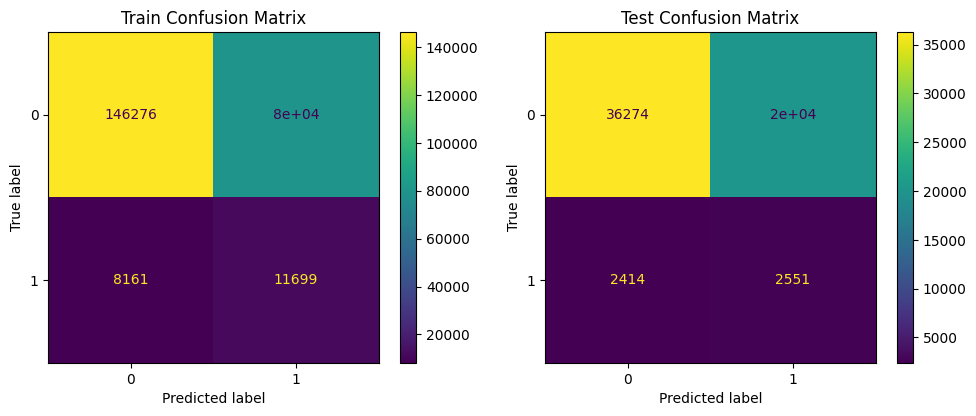


📊 Train Metrics:
Accuracy : 0.642
Precision: 0.128
Recall   : 0.589
F1 Score : 0.210

📊 Test Metrics:
Accuracy : 0.631
Precision: 0.112
Recall   : 0.514
F1 Score : 0.184


In [347]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


#df = df.dropna().reset_index(drop=True)

# Split features and target
X = df.drop(columns=['TARGET'])
y = df['TARGET']
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features),
       #('passthrough', 'passthrough', passthrough_features)
    ]
)

rf = RandomForestClassifier(n_estimators = 40,max_depth = 10, class_weight='balanced')
clf = DecisionTreeClassifier(
    criterion="entropy",     # or "entropy"
    max_depth=20,       # try limiting to avoid overfitting
    random_state=42
)
log_reg = LogisticRegression()

# Full modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',rf)
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred),
                       display_labels=model.classes_).plot(ax=ax[0])
ax[0].set_title("Train Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred),
                       display_labels=model.classes_).plot(ax=ax[1])
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
def evaluate(y_true, y_pred, dataset_name):
    print(f"\n📊 {dataset_name} Metrics:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.3f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.3f}")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")

from sklearn.model_selection import cross_val_score

#scores = cross_val_score(model, X, y, cv=5, scoring='f1')
#print("Mean CV F1:", scores.mean())


# Plot tree
#plt.figure(figsize=(16, 8))
#plot_tree(clf, feature_names=X.columns, class_names=True, filled=True, fontsize=10)
#plt.show()


🔍 Computing SHAP values...
Number of features after preprocessing: 3
X_test_preprocessed shape: (61503, 3)
shap_values shape: (61503, 3, 2)
shap_values_plot shape after extraction: (61503, 3)

📊 Generating SHAP summary plot...


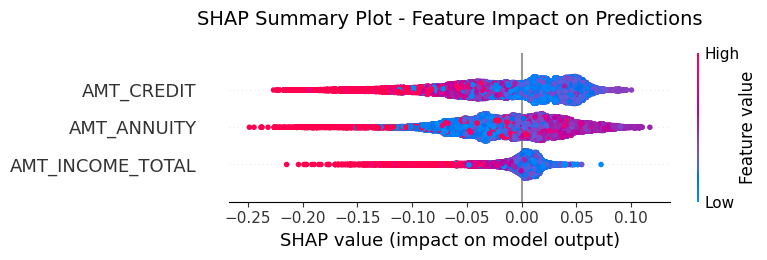


📊 Generating SHAP feature importance plot...


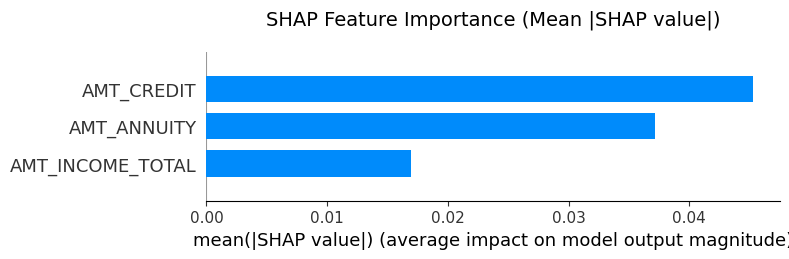


📊 Generating additional SHAP dependence plot...


<Figure size 1000x600 with 0 Axes>

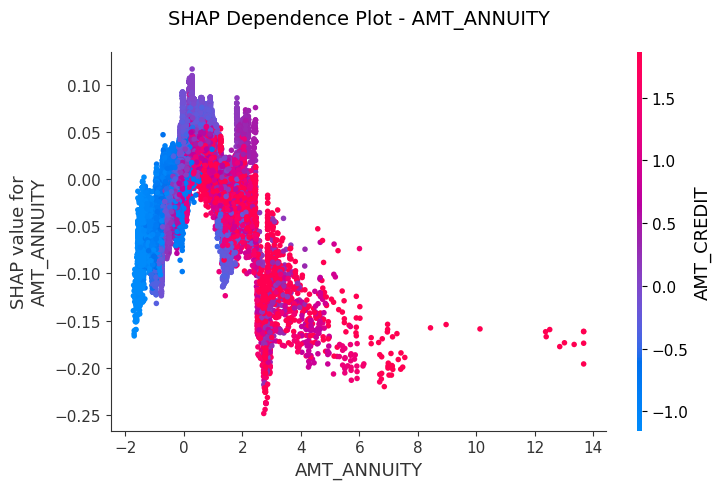


📊 Generating SHAP dependence plot...


<Figure size 1000x600 with 0 Axes>

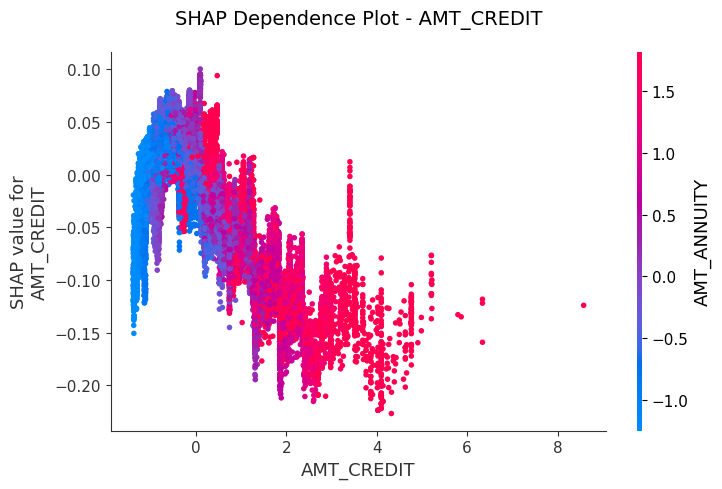


🏆 Top 10 Features by Mean |SHAP value|:
         feature  mean_abs_shap
      AMT_CREDIT       0.045261
     AMT_ANNUITY       0.037181
AMT_INCOME_TOTAL       0.016972


In [384]:
# ========================================
# SHAP Analysis
# ========================================
import shap
import numpy as np

# Initialize SHAP explainer
print("\n🔍 Computing SHAP values...")

# Get the preprocessed training data
X_train_preprocessed = model.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = model.named_steps['preprocessor'].transform(X_test)

# Get feature names after preprocessing
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        # Get feature names from OneHotEncoder
        ohe = transformer.named_steps['encoder']
        feature_names.extend(ohe.get_feature_names_out(features))
    elif name == 'passthrough':
        feature_names.extend(features)

print(f"Number of features after preprocessing: {len(feature_names)}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

# Create SHAP explainer for the trained classifier
explainer = shap.TreeExplainer(model.named_steps['classifier'])

# Compute SHAP values faor test set
shap_values = explainer.shap_values(X_test_preprocessed)

# Handle the shape: (samples, features, classes) -> (samples, features)
print(f"shap_values shape: {shap_values.shape}")

# For binary classification with shape (samples, features, 2), take class 1 (positive class)
if len(shap_values.shape) == 3:
    shap_values_plot = shap_values[:, :, 1]  # Select positive class across all samples and features
else:
    shap_values_plot = shap_values

print(f"shap_values_plot shape after extraction: {shap_values_plot.shape}")

# ========================================
# SHAP Visualizations
# ========================================

# 1. Summary Plot (beeswarm) - shows feature importance and impact
print("\n📊 Generating SHAP summary plot...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_plot, X_test_preprocessed, 
                  feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot - Feature Impact on Predictions", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 2. Bar Plot - mean absolute SHAP values (feature importance)
print("\n📊 Generating SHAP feature importance plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_plot, X_test_preprocessed, 
                  feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# 4. Additional Dependence Plot - second most important feature
print("\n📊 Generating additional SHAP dependence plot...")

# Get second most important feature
mean_abs_shap = np.abs(shap_values_plot).mean(axis=0)
top_features_idx = np.argsort(mean_abs_shap)[::-1]

if len(top_features_idx) > 1:
    second_feature_idx = top_features_idx[1]
    second_feature_name = feature_names[second_feature_idx]
    
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(
        second_feature_idx,
        shap_values_plot,
        X_test_preprocessed,
        feature_names=feature_names,
        show=False
    )
    plt.title(f"SHAP Dependence Plot - {second_feature_name}", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# 5. Dependence Plot - shows interaction between top feature and others
print("\n📊 Generating SHAP dependence plot...")
# Find the feature with highest mean absolute SHAP value
mean_abs_shap = np.abs(shap_values_plot).mean(axis=0)
top_feature_idx = np.argmax(mean_abs_shap)
top_feature_name = feature_names[top_feature_idx]

plt.figure(figsize=(10, 6))
shap.dependence_plot(
    top_feature_idx,
    shap_values_plot,
    X_test_preprocessed,
    feature_names=feature_names,
    show=False
)
plt.title(f"SHAP Dependence Plot - {top_feature_name}", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Print top features by SHAP importance
print("\n🏆 Top 10 Features by Mean |SHAP value|:")
shap_importance = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': np.abs(shap_values_plot).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False)

print(shap_importance.head(10).to_string(index=False))

In [383]:
# ========================================
# SHAP Analysis
# ========================================
import shap
import numpy as np

# Initialize SHAP explainer
print("\n🔍 Computing SHAP values...")

# Get the preprocessed training data
X_train_preprocessed = model.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = model.named_steps['preprocessor'].transform(X_test)

# Get feature names after preprocessing
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(features)
    elif name == 'cat':
        # Get feature names from OneHotEncoder
        ohe = transformer.named_steps['encoder']
        feature_names.extend(ohe.get_feature_names_out(features))
    elif name == 'passthrough':
        feature_names.extend(features)

print(f"Number of features after preprocessing: {len(feature_names)}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

# Create SHAP explainer for the trained classifier
explainer = shap.TreeExplainer(model.named_steps['classifier'])

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test_preprocessed)

# Debug: Check the shape of shap_values
print(f"Type of shap_values: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"shap_values is a list with {len(shap_values)} elements")
    for i, sv in enumerate(shap_values):
        print(f"  Class {i} shape: {sv.shape}")
    # For binary classification, use class 1 (positive class)
    shap_values_plot = shap_values[1]
else:
    print(f"shap_values shape: {shap_values.shape}")
    shap_values_plot = shap_values

print(f"shap_values_plot shape: {shap_values_plot.shape}")
print(f"Expected shape: ({X_test_preprocessed.shape[0]}, {X_test_preprocessed.shape[1]})")

# Verify shapes match
assert shap_values_plot.shape[1] == X_test_preprocessed.shape[1], \
    f"SHAP values shape {shap_values_plot.shape} doesn't match features {X_test_preprocessed.shape}"


🔍 Computing SHAP values...
Number of features after preprocessing: 3
X_test_preprocessed shape: (61503, 3)
Type of shap_values: <class 'numpy.ndarray'>
shap_values shape: (61503, 3, 2)
shap_values_plot shape: (61503, 3, 2)
Expected shape: (61503, 3)


In [369]:
explainer = shap.TreeExplainer(model.named_steps['classifier'])
X_transformed = model.named_steps['preprocessor'].transform(X_train)

# Compute SHAP values for the transformed data
shap_values = explainer.shap_values(X_transformed)


In [376]:
explainer = shap.TreeExplainer(model.named_steps['classifier'])
X_transformed = model.named_steps['preprocessor'].transform(X_train)
shap_values = explainer.shap_values(X_transformed)

# Use the positive class index [1]
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0, :],
    X_transformed[0, :],
    feature_names=['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
)


DimensionError: Length of features is not equal to the length of shap_values!

In [377]:
print("len(feature_names):", len(feature_names))
print("len(shap_values[1][0]):", len(shap_values[1][0]))
print("X_transformed.shape[1]:", X_transformed.shape[1])


len(feature_names): 3
len(shap_values[1][0]): 2
X_transformed.shape[1]: 3


In [370]:
sample_idx = 0

shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][sample_idx, :],
    X_transformed[sample_idx, :],
    feature_names=feature_names  # <-- must match transformed array
)


DimensionError: Length of features is not equal to the length of shap_values!

In [362]:
model.named_steps['classifier']

,n_estimators,40
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [367]:
explainer = shap.TreeExplainer(model.named_steps['classifier'])
X_transformed = model.named_steps['preprocessor'].transform(X_train)

shap_values = explainer.shap_values(X_transformed)

shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0, :],
    X_transformed[0, :],
    feature_names=numeric_features
)

DimensionError: Length of features is not equal to the length of shap_values!

In [358]:
import shap

X_sample = preprocessor.transform(X_train)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_sample)

# Summary plot (shows global influence of features)
shap.summary_plot(shap_values, X_sample)

# Force plot for one prediction (shows local decision path)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_sample.iloc[0,:])


KeyboardInterrupt: 

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(rf, X_train[numeric_features], ['AMT_INCOME_TOTAL'])
plt.show()


                                     feature  importance
0                                AMT_ANNUITY    0.186162
1                                 AMT_CREDIT    0.173568
2                           AMT_INCOME_TOTAL    0.142742
3                      CNT_FAM_MEMBERS_BKT_2    0.018489
4                          FLAG_OWN_REALTY_Y    0.017303
5   AMT_REQ_CREDIT_BUREAU_YEAR_BKT_1 or more    0.017044
6                          FLAG_OWN_REALTY_N    0.016621
7                   OCCUPATION_TYPE_Laborers    0.014537
8           AMT_REQ_CREDIT_BUREAU_YEAR_BKT_0    0.014479
9                      CNT_FAM_MEMBERS_BKT_3    0.014382
10                NAME_FAMILY_STATUS_Married    0.012814
11                   OCCUPATION_TYPE_Unknown    0.012569
12               OCCUPATION_TYPE_Sales staff    0.012471
13                            FLAG_OWN_CAR_Y    0.011916
14                            FLAG_OWN_CAR_N    0.011755
15    AMT_REQ_CREDIT_BUREAU_YEAR_BKT_Unknown    0.011051
16                EMPLOYMENT_BK

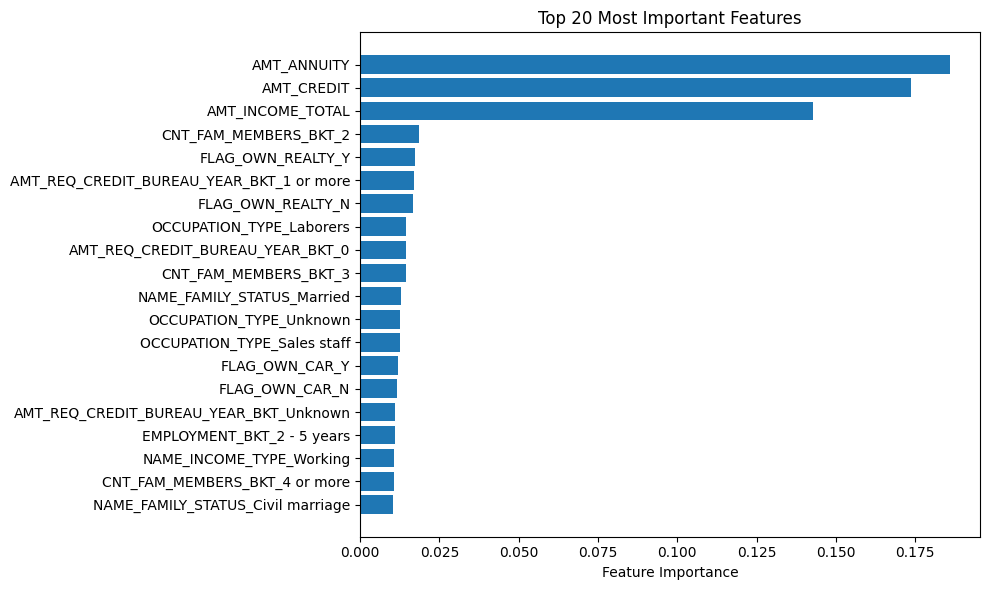

In [323]:

numeric_names = numeric_features
categorical_names = list(preprocessor.named_transformers_['cat']
                         .named_steps['encoder']
                         .get_feature_names_out(categorical_features))

# Combine all feature names (skip passthrough for now if unused)
feature_names = numeric_names + categorical_names

# Get importances and sort
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame
feat_imp = pd.DataFrame({
    'feature': np.array(feature_names)[indices],
    'importance': importances[indices]
})

# Display top 20
print(feat_imp.head(20))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['feature'].head(20)[::-1], feat_imp['importance'].head(20)[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()

In [140]:
import joblib
import os

# Assume your preprocessor is already fitted
# e.g., preprocessor.fit(df)

# Ensure the artifacts directory exists
os.makedirs("../artifacts", exist_ok=True)

# Define the path
transformer_path = "../artifacts/preprocessor.pkl"

# Save (serialize) the fitted transformer
joblib.dump(preprocessor, transformer_path)

print(f"✅ Transformer saved to {transformer_path}")

✅ Transformer saved to ../artifacts/preprocessor.pkl


In [304]:
# 👇 Get the feature names
feature_names = preprocessor.get_feature_names_out()

# 👇 Create a DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=feature_names)

print(df_transformed.head())

ValueError: Shape of passed values is (307511, 88), indices imply (307511, 87)

In [ ]:
# Days employed
import pandas as pd

# Convert DAYS_EMPLOYED to absolute years
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs() / 365

# Define new bins and labels
bins = [0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')]
labels = [
    '< 0.5 years',
    '0.5 - 1 year',
    '1 - 2 years',
    '2 - 5 years',
    '5 - 10 years',
    '10 - 20 years',
    '20 - 30 years',
    '> 30 years'
]

# Create employment bucket column
df['EMPLOYMENT_BUCKET'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)

# Count TARGET values per bucket
bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)

# Add total column
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)

# Calculate TARGET = 1 rate
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

# Optional: format as percentage
bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

print(bucket_counts)



In [83]:
#df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()
# Define new bins and labels
bins = [0, 1, 2, 3, float('inf')]
labels = [
    '0',
    '1',
    '2',
    '3',
]

# Create employment bucket column
df['OBS_BUCKET'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=bins, labels=labels, right=False)
# Count TARGET values per bucket
bucket_counts = df.groupby(['OBS_BUCKET', 'TARGET']).size().unstack(fill_value=0)
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

bucket_counts

/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_81088/4023069895.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df.groupby(['OBS_BUCKET', 'TARGET']).size().unstack(fill_value=0)


TARGET,0,1,TOTAL,TARGET_1_RATE,TARGET_1_RATE_PCT
OBS_BUCKET,,,,,
0,66678,5123,71801,0.071350,7.13
1,58755,4650,63405,0.073338,7.33
2,46124,4068,50192,0.081049,8.10
3,73902,6692,80594,0.083033,8.30


In [43]:
#df['EXT_SOURCE_1'].isna().sum()/len(df)
df['EXT_SOURCE_2'].isna().sum()/len(df)
#df['EXT_SOURCE_3'].isna().sum()/len(df)

np.float64(0.0021462646864665006)

In [29]:
df['OWN_CAR_AGE'].notna().sum() 
df['OWN_CAR_AGE'].isna().sum()

np.int64(202929)

In [54]:
import pandas as pd

# Convert DAYS_EMPLOYED to absolute years
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs() / 365

# Define new bins and labels
bins = [0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')]
labels = [
    '< 0.5 years',
    '0.5 - 1 year',
    '1 - 2 years',
    '2 - 5 years',
    '5 - 10 years',
    '10 - 20 years',
    '20 - 30 years',
    '> 30 years'
]

# Create employment bucket column
df['EMPLOYMENT_BUCKET'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)

# Count TARGET values per bucket
bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)

# Add total column
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)

# Calculate TARGET = 1 rate
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

# Optional: format as percentage
bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

print(bucket_counts)


TARGET                 0     1  TOTAL  TARGET_1_RATE  TARGET_1_RATE_PCT
EMPLOYMENT_BUCKET                                                      
< 0.5 years         8718  1034   9752       0.106030              10.60
0.5 - 1 year       16121  2031  18152       0.111888              11.19
1 - 2 years        28210  3631  31841       0.114035              11.40
2 - 5 years        68813  7709  76522       0.100742              10.07
5 - 10 years       60105  4785  64890       0.073740               7.37
10 - 20 years      36303  2119  38422       0.055151               5.52
20 - 30 years       9123   429   9552       0.044912               4.49
> 30 years         55293  3087  58380       0.052878               5.29


/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_30112/3670023734.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)


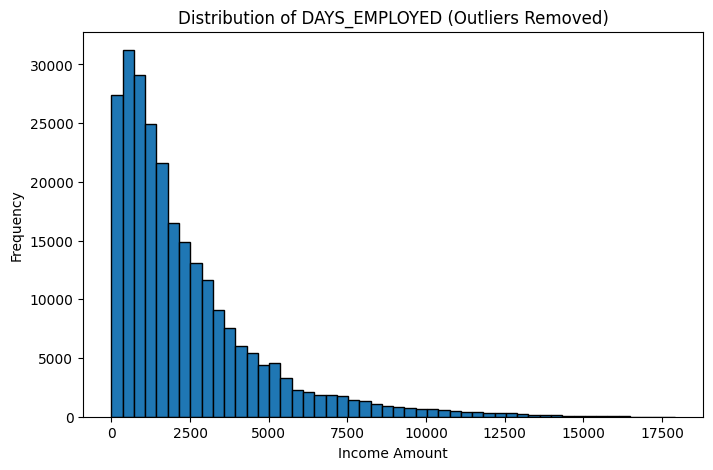

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate IQR
Q1 = df['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['DAYS_EMPLOYED'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist((df_filtered['DAYS_EMPLOYED'])*-1, bins=50, edgecolor='black')

plt.title('Distribution of DAYS_EMPLOYED (Outliers Removed)')
plt.xlabel('Income Amount')
plt.ylabel('Frequency')

plt.show()


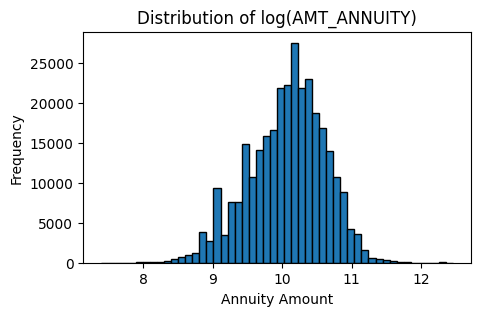

In [42]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_ANNUITY']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_ANNUITY)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


In [37]:
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_ANNUITY']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_ANNUITY)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


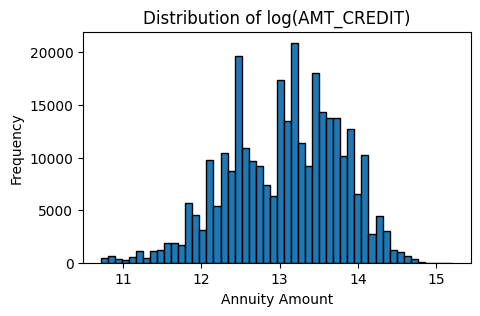

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_CREDIT']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_CREDIT)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


In [34]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

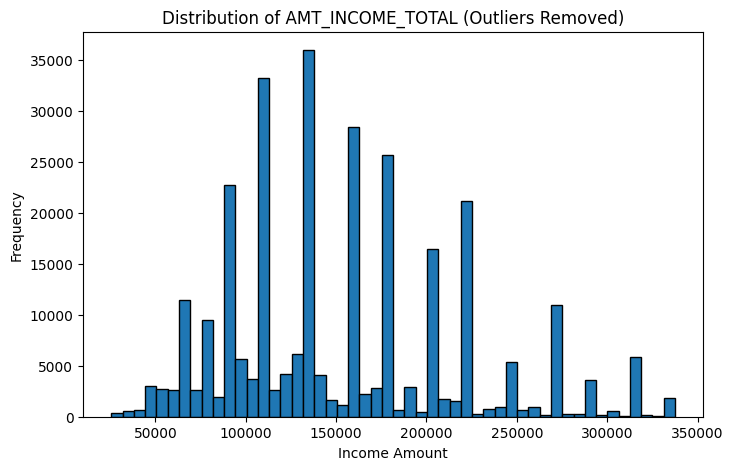

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate IQR
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['AMT_INCOME_TOTAL'] >= lower_bound) & (df['AMT_INCOME_TOTAL'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['AMT_INCOME_TOTAL'], bins=50, edgecolor='black')

plt.title('Distribution of AMT_INCOME_TOTAL (Outliers Removed)')
plt.xlabel('Income Amount')
plt.ylabel('Frequency')

plt.show()


In [17]:
sums= df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index().groupby("TARGET")["count"].transform("sum")

_df = df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index()

_df['ratio_within_target'] = _df['count']/sums
# Compute total count per TARGET
#totals = df.groupby("TARGET")["count"].transform("sum")
_df
# Compute ratio within each TARGET group
#df["ratio_within_target"] = df["count"] / totals


,NAME_CONTRACT_TYPE,TARGET,count,ratio_within_target
0,Cash loans,0,255011,0.902100
1,Revolving loans,0,27675,0.097900
2,Cash loans,1,23221,0.935388
3,Revolving loans,1,1604,0.064612


In [19]:
sums= df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index().groupby("NAME_CONTRACT_TYPE")["count"].transform("sum")

_df = df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index()

_df['ratio_within_contract'] = _df['count']/sums
# Compute total count per TARGET
#totals = df.groupby("TARGET")["count"].transform("sum")
_df.sort_values('NAME_CONTRACT_TYPE')
# Compute ratio within each TARGET group
#df["ratio_within_target"] = df["count"] / totals


,NAME_CONTRACT_TYPE,TARGET,count,ratio_within_contract
0,Cash loans,0,255011,0.916541
2,Cash loans,1,23221,0.083459
1,Revolving loans,0,27675,0.945217
3,Revolving loans,1,1604,0.054783
